# EDA on CPU_Usage-OVERALL_ATTACK

## Environment

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
# Load the data
df = pd.read_csv('DataExtractors/Java-DataExtractor/output/CPU_Usage-OVERALL_ATTACK.csv')
# df = pd.read_csv('DataExtractors/Python-DataExtractor/output/CPU_Usage-OVERALL_ATTACK.csv')

# Convert the time column to datetime and set it as index
df['time'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('time')

In [31]:
def plot_attack_periods(df):
    # Convert DataFrame index to POSIX time and round to nearest second
    df.index = pd.Series(df.index.astype('int64') / 1e9).round().values

    # Iterate over each column (except the time and label columns)
    for column in df.columns:
        if column in ['timestamp', 'label']:
            continue

        # Find the indices where the label changes
        change_indices = np.where(df['label'].diff().ne(0))[0]

        # Add the start and end indices
        change_indices = np.insert(change_indices, [0, len(change_indices)], [0, len(df)])

        # Plot each continuous segment separately
        for start, end in zip(change_indices[:-1], change_indices[1:] - 1):  # Adjust end index
            segment = df.iloc[start:end]
            if segment.empty:
                continue
            color = 'red' if segment['label'].iloc[0] == 1 else 'blue'
            segment[column].plot(color=color)

            # Fit a line to the data and plot it
            # if len(segment[column]) > 1:  # Need at least two points to fit a line
            #     m, b = np.polyfit(segment.index, segment[column], 1)
            #     plt.plot(segment.index, m * segment.index + b, color='black')

        plt.title(column)
        plt.show()

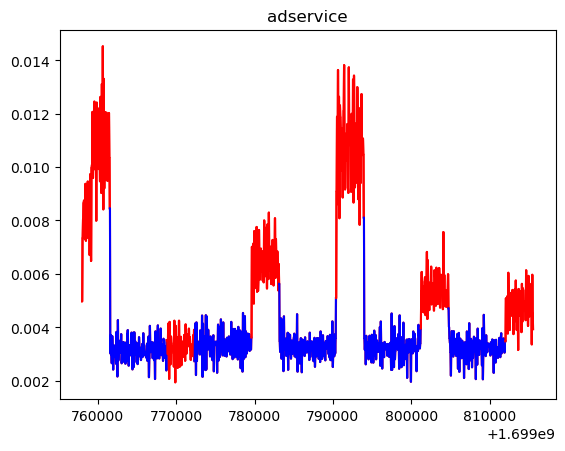

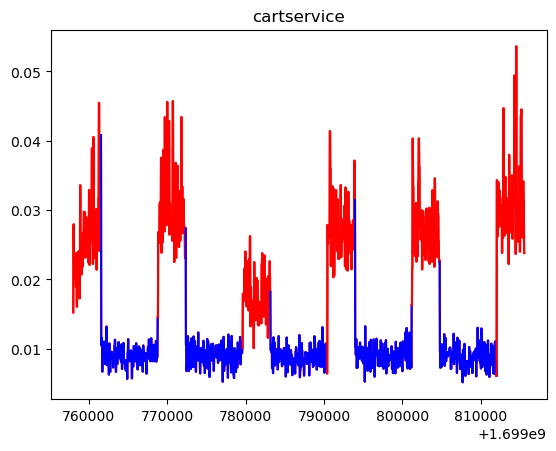

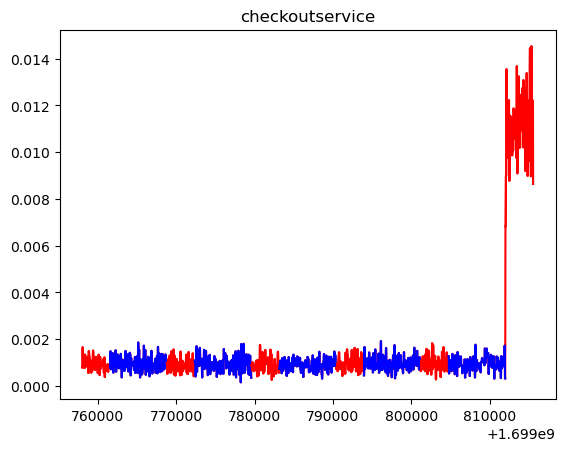

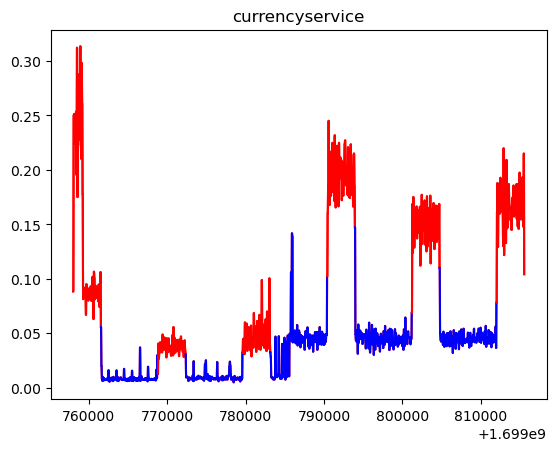

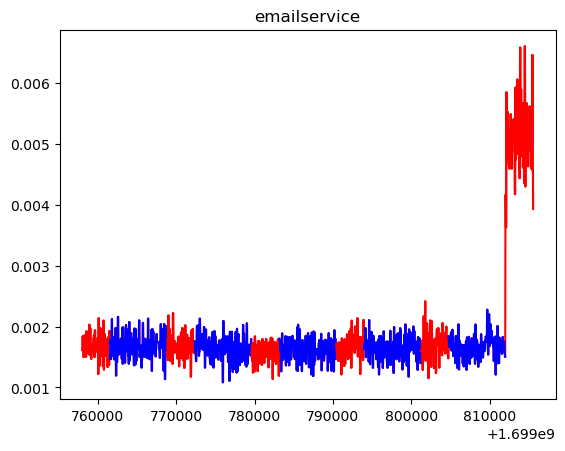

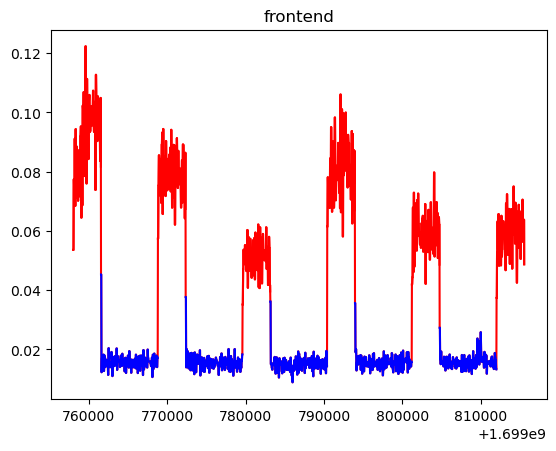

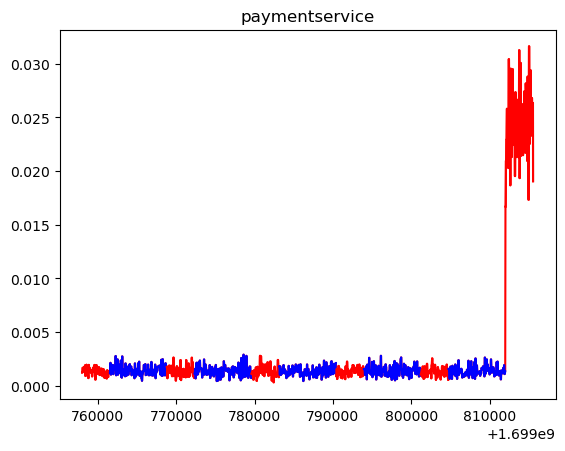

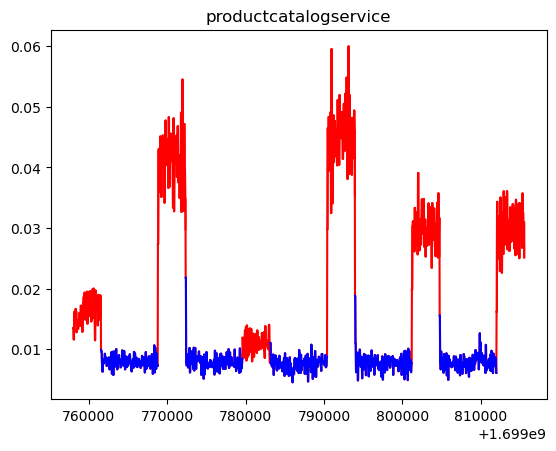

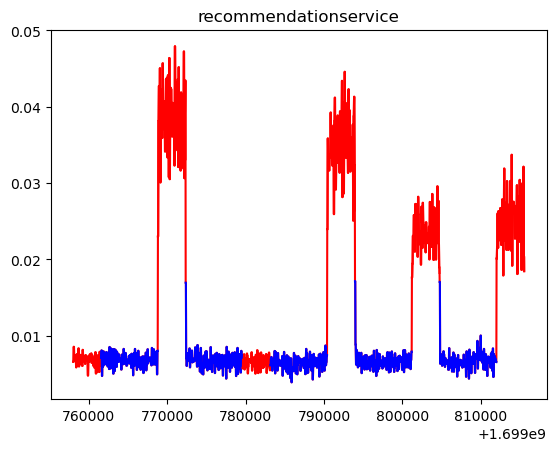

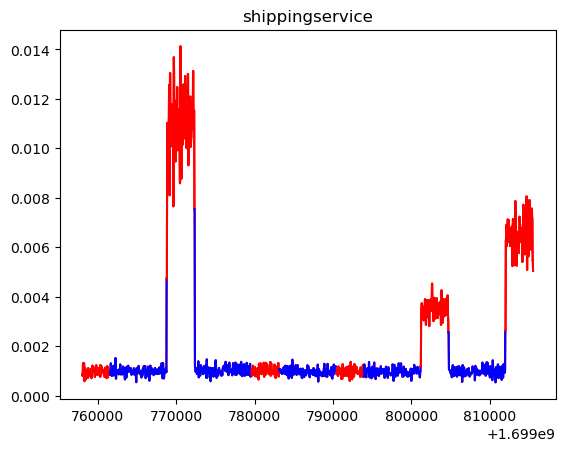

In [32]:
plot_attack_periods(df)